# Predicting Stock Prices

# Data Wrangling

## Imports

In [1]:
# Load libraries and packages
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf


from datetime import datetime

## Load Data

In [2]:
# tickers for targeted stocks, consumer discrectionary sector, casinos and gaming sub-industry
tickers = ['CZR', 'MGM', 'LVS', 'WYNN']

In [3]:
# selecting data from past five years
end = datetime(2022, 5, 16)
start = datetime(end.year - 5, end.month, end.day)

In [4]:
# setting dataframe names
for tick in tickers:
    globals()[tick] = yf.download(tick, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# creating df
stock_list = [CZR, MGM, LVS, WYNN]

for stock, tick in zip(stock_list, tickers):
    stock['Ticker'] = tick
    
    
df = pd.concat(stock_list, axis=0)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2017-05-16,20.799999,20.900000,20.450001,20.650000,20.650000,801400,CZR
2017-05-17,20.299999,20.549999,20.049999,20.225000,20.225000,914500,CZR
2017-05-18,20.100000,20.250000,19.750000,19.950001,19.950001,1052500,CZR


## Explore Data

In [6]:
CZR.head(3)

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2017-05-16,20.799999,20.900000,20.450001,20.650000,20.650000,801400,CZR
2017-05-17,20.299999,20.549999,20.049999,20.225000,20.225000,914500,CZR
2017-05-18,20.100000,20.250000,19.750000,19.950001,19.950001,1052500,CZR


In [7]:
MGM.head(3)

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2017-05-16,31.770000,32.279999,31.610001,32.200001,30.551605,8987300,MGM
2017-05-17,31.719999,31.950001,31.090000,31.150000,29.555357,9034600,MGM
2017-05-18,30.600000,31.290001,30.500000,30.959999,29.375078,7042500,MGM


In [8]:
LVS.head(3)

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2017-05-16,58.250000,58.720001,57.820000,58.099998,50.081226,3220800,LVS
2017-05-17,57.630001,57.660000,56.750000,56.840000,48.995129,4702900,LVS
2017-05-18,56.459999,57.459999,56.330002,56.849998,49.003742,3643600,LVS


In [9]:
WYNN.head(3)

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2017-05-16,126.430000,129.029999,126.050003,127.910004,119.609947,2408100,WYNN
2017-05-17,126.230003,126.650002,122.389999,122.620003,114.663231,2716000,WYNN
2017-05-18,120.550003,123.750000,120.519997,122.419998,114.476189,1651800,WYNN


In [10]:
# checking dtypes and if any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4964 entries, 2017-05-16 to 2022-04-19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4964 non-null   float64
 1   High       4964 non-null   float64
 2   Low        4964 non-null   float64
 3   Close      4964 non-null   float64
 4   Adj Close  4964 non-null   float64
 5   Volume     4964 non-null   int64  
 6   Ticker     4964 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 310.2+ KB


In [11]:
# summary statistics for CZR
CZR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,54.225198,55.409625,52.955946,54.182417,54.182417,2.480340e+06
std,26.126635,26.608900,25.607470,26.097082,26.097082,3.131932e+06
min,7.160000,8.670000,6.020000,7.100000,7.100000,1.567000e+05
25%,36.080002,37.500000,34.810001,36.090000,36.090000,8.014000e+05
50%,46.410000,47.279999,45.500000,46.400002,46.400002,1.465400e+06
75%,74.629997,76.419998,72.404999,74.860001,74.860001,2.883100e+06
max,119.160004,119.809998,116.599998,119.489998,119.489998,4.566720e+07


In [12]:
# summary statistics for MGM
MGM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,31.317188,31.815520,30.810024,31.303465,30.776315,9.754230e+06
std,7.880261,7.949782,7.835475,7.892436,7.927046,8.336045e+06
min,7.170000,9.030000,5.900000,7.140000,7.134835,1.057800e+06
25%,27.180000,27.580000,26.830000,27.250000,26.585722,5.238900e+06
50%,31.129999,31.480000,30.750000,31.180000,30.116270,7.202000e+06
75%,36.209999,36.680000,35.680000,36.279999,35.027122,1.034960e+07
max,50.919998,51.169998,49.240002,50.369999,50.362457,9.009820e+07


In [13]:
# summary statistics for LVS
LVS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,57.250427,58.006535,56.424448,57.207446,54.250839,5.465354e+06
std,10.994942,10.899599,11.085668,11.009802,8.952013,4.143651e+06
min,31.719999,33.310001,31.260000,32.090000,32.090000,6.304000e+05
25%,48.709999,49.840000,47.750000,48.570000,47.939999,3.072100e+06
50%,58.299999,59.049999,57.410000,58.310001,55.129089,4.447900e+06
75%,64.349998,64.980003,63.770000,64.449997,60.778320,6.659400e+06
max,80.550003,81.449997,80.120003,81.269997,73.109726,6.779820e+07


In [14]:
# summary statistics for WYNN
WYNN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,119.708018,121.616986,117.608936,119.581958,116.192676,3.128612e+06
std,31.521328,31.472036,31.513502,31.520091,28.499085,2.405207e+06
min,41.150002,51.860001,35.840000,43.020000,43.020000,4.365000e+05
25%,93.269997,95.500000,91.239998,93.410004,92.930000,1.770800e+06
50%,119.419998,121.040001,117.510002,119.320000,116.440002,2.512500e+06
75%,138.149994,139.940002,136.110001,138.169998,134.376938,3.617100e+06
max,201.990005,203.630005,198.160004,201.509995,190.356094,2.608880e+07


## Visualize Target Variable

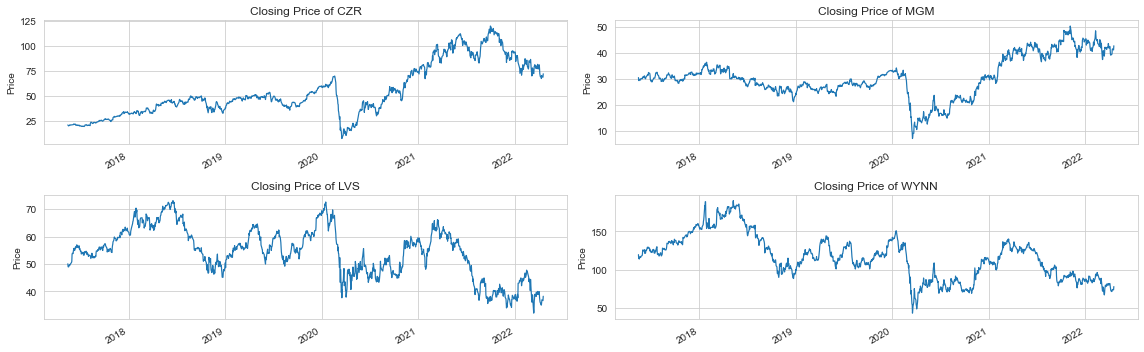

In [15]:
# quick visual for closing price for each stock
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.subplots_adjust(top=1.25, bottom=1.2)


for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Adj Close'].plot(linewidth=1.2)
    plt.ylabel('Price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tickers[i-1]}")

    
plt.tight_layout()

## Save data

In [16]:
# we will have separate df for all four stocks as well as individual dfs for each stock
df_datapath = r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\df.csv'
df.to_csv(df_datapath)
CZR_datapath = r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\CZR.csv'
CZR.to_csv(CZR_datapath)
MGM_datapath = r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\MGM.csv'
MGM.to_csv(MGM_datapath)
LVS_datapath = r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\LVS.csv'
LVS.to_csv(LVS_datapath)
WYNN_datapath = r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\WYNN.csv'
WYNN.to_csv(WYNN_datapath)

## Summary

> This capstone project is focused on gathering historical stock information from 4 major companies in the SP500 and building a regression model as well as an LSTM model. For the data wrangling portion of this project, not much work needed to be done. Loading the data from yahoo finance makes things easy because yahoo does a great job at providing clean and staight forward data that is nearly analysis ready. After loading the necessary libraries and packages, the next step was to download the desired data. Data was downloaded on a daily interval for the past five years, and loaded into a dataframe. Adding a company name column will help with differentiating later on. Columns open, high, low, close, and adj close are all comprised of floats and represent the price a stock opened, the highest price it traded, lowest price it traded, price it closed, and the adjusted price (this will be our target feature) it closed after dividends were paid that day respectively. The volume column is comprised of integers and represents the total value of shares traded that day. Lastly the added column of company name is comprised of the object type and is simply used as an identifier for each instance. There is roughly 1300 instances for each targeted stock, and values for each feature may not always be unique but each value for each row and column represents reality, so no need to spend time with uniqueness. With a datetime index, their are no duplicates or missing values in this dataset. This is partly due to the wonderful job yahoo finance has done on recording this information as mentioned above. Moving forward we will truly explore the data in order to get a better understanding. We will look at and answer questions pertaining to price changes in stock over time, average daily returns for the stocks, calculate moving averages, inspect correlations between each stock, and ultimately predict the future behavior of the stocks using regression and LSTM methods.